In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [3]:
arr=imread('robot images/test0.jpg')
print("Min and Max",arr.min(),arr.max())

Min and Max 2 230


In [4]:
board_size=(4,4)

In [5]:
if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
    print("Min and Max",arr.min(),arr.max())
    print("Scaling it down....")
    arr=arr/255
    print("Min and Max",arr.min(),arr.max())

Min and Max 2 230
Scaling it down....
Min and Max 0.00784313725490196 0.9019607843137255


In [6]:
if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
    print("arr shape",arr.shape)
    print("Removing alpha channel")
    arr=arr[:,:,:3]
    print("new arr shape",arr.shape)


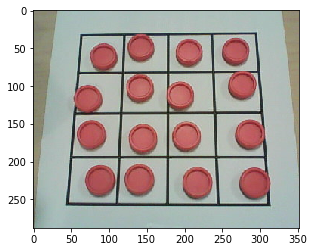

In [7]:
imshow(arr)

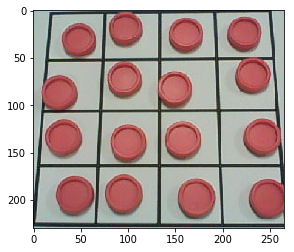

In [8]:
arr=arr[30:260,45:310]
imshow(arr)

In [9]:
def get_square(arr,Nr,Nc,r,c):
    image_rows,image_cols=arr.shape[:2]
    square_row=image_rows/Nr
    square_col=image_cols/Nc
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    square=arr[start_row:end_row,start_col:end_col]
    return square

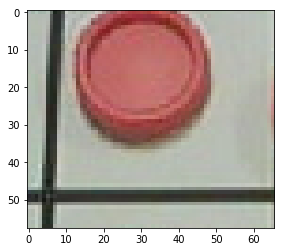

In [10]:
imshow(get_square(arr,board_size[0],board_size[1],1,1))

# I need to make a test set

1. Put all of the resizing into a function

In [11]:
def get_square(arr,Nr,Nc,r,c,percent=100):
    image_rows,image_cols=arr.shape[:2]
    square_row=int(image_rows/Nr)
    square_col=int(image_cols/Nc)
    
    start_row=int(r*square_row)
    end_row=int((r+1)*square_row)

    start_col=int(c*square_col)
    end_col=int((c+1)*square_col)
    
    if percent==100:
        square=arr[start_row:end_row,start_col:end_col]
        
    else:
        dc=int((end_col-start_col)*(100-percent)/2.0/100.0)
        dr=int((end_row-start_row)*(100-percent)/2.0/100.0)

        square=arr[start_row+dr:end_row-dr,start_col+dc:end_col-dc]
        
        
    return square

def read_image(fname):
    arr=imread(fname)
    print("Min and Max",arr.min(),arr.max())    
    
    if any(arr>1):  # if the image is read in as uint8, it's not 0-1 but 0-255, so scale it down
        print("Min and Max",arr.min(),arr.max())
        print("Scaling it down....")
        arr=arr/255
        print("Min and Max",arr.min(),arr.max())    
        
    if len(arr.shape)>2 and arr.shape[2]>3:  # alpha channel
        print("arr shape",arr.shape)
        print("Removing alpha channel")
        arr=arr[:,:,:3]
        print("new arr shape",arr.shape)
        
        
    arr=arr[30:260,45:310]
    
    return arr

Min and Max 2 230
Min and Max 2 230
Scaling it down....
Min and Max 0.00784313725490196 0.9019607843137255


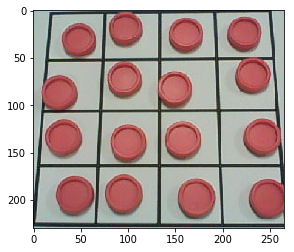

In [12]:
arr=read_image('robot images/test0.jpg')
imshow(arr)

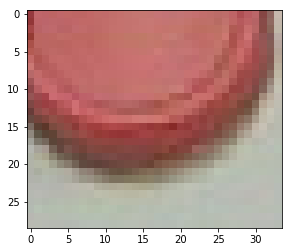

In [13]:
r,c=1,1
square=get_square(arr,board_size[0],board_size[1],r,c,50)
imshow(square)

Min and Max 1 233
Min and Max 1 233
Scaling it down....
Min and Max 0.00392156862745098 0.9137254901960784


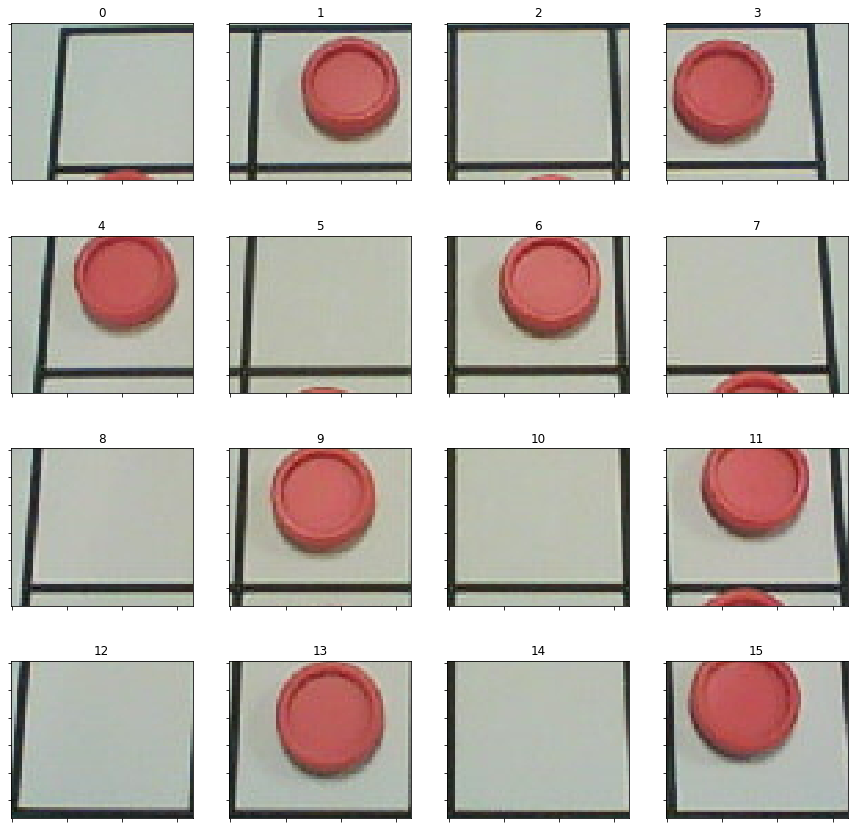

In [14]:
fname='robot images/test3.jpg'
count=1
arr=read_image(fname)
figure(figsize=(15,15))
for r in range(4):
    for c in range(4):
        subplot(4,4,count)
        square=get_square(arr,board_size[0],board_size[1],r,c)
        imshow(square)
        title(count-1)
            
        gca().set_xticklabels([])
        gca().set_yticklabels([])
        count+=1
        
        
training_data={'red':{
        'robot images/test0.jpg':list(range(16)),
        'robot images/test1.jpg':list(range(16)),
        'robot images/test2.jpg':list(range(16)),
    },
     'white': {
        'robot images/test4.jpg':list(range(16)),
        'robot images/test10.jpg':list(range(16)),
     },
     'black': {
        'robot images/test5.jpg':list(range(16)),
        'robot images/test6.jpg':list(range(16)),
        'robot images/test7.jpg':list(range(16)),
     }}


testing_data={'red':{
    'robot images/test3.jpg':[1,3,4,6,9,11,13,15],
    },
     'white': {
        'robot images/test3.jpg':[0,2,5,7,8,10,12,14],
        'robot images/test8.jpg':[2,5,8,9,10,11],
     },
     'black': {
        'robot images/test8.jpg':[0,1,3,4,6,7,12,13,14,15],
     }}

In [15]:
try:
    os.mkdir('pieces')
except FileExistsError:
    pass

try:
    os.mkdir('pieces/red')
except FileExistsError:
    pass

try:
    os.mkdir('pieces/white')
except FileExistsError:
    pass

try:
    os.mkdir('pieces/black')
except FileExistsError:
    pass

#====================================

try:
    os.mkdir('test_pieces')
except FileExistsError:
    pass

try:
    os.mkdir('test_pieces/red')
except FileExistsError:
    pass

try:
    os.mkdir('test_pieces/white')
except FileExistsError:
    pass

try:
    os.mkdir('test_pieces/black')
except FileExistsError:
    pass


percent=50  # percent of square to save

In [16]:
filecount=0
data=training_data
for color in ['red','white','black']:
    for fname in data[color]:
        count=1
        arr=read_image(fname)

        for r in range(4):
            for c in range(4):
                square=get_square(arr,board_size[0],board_size[1],r,c,percent)

                square=square[:57,:66]
                if count-1 in data[color][fname]:
                    fname2='pieces/%s/piece%d.png' % (color,filecount)
                    print("Saving %s shape %d,%d" % (fname2,square.shape[0],square.shape[1]))
                    imsave(fname2,square)
                    filecount+=1

                count+=1


Min and Max 2 230
Min and Max 2 230
Scaling it down....
Min and Max 0.00784313725490196 0.9019607843137255
Saving pieces/red/piece0.png shape 29,34
Saving pieces/red/piece1.png shape 29,34
Saving pieces/red/piece2.png shape 29,34
Saving pieces/red/piece3.png shape 29,34
Saving pieces/red/piece4.png shape 29,34
Saving pieces/red/piece5.png shape 29,34
Saving pieces/red/piece6.png shape 29,34
Saving pieces/red/piece7.png shape 29,34
Saving pieces/red/piece8.png shape 29,34
Saving pieces/red/piece9.png shape 29,34
Saving pieces/red/piece10.png shape 29,34
Saving pieces/red/piece11.png shape 29,34
Saving pieces/red/piece12.png shape 29,34
Saving pieces/red/piece13.png shape 29,34
Saving pieces/red/piece14.png shape 29,34
Saving pieces/red/piece15.png shape 29,34
Min and Max 2 238
Min and Max 2 238
Scaling it down....
Min and Max 0.00784313725490196 0.9333333333333333
Saving pieces/red/piece16.png shape 29,34
Saving pieces/red/piece17.png shape 29,34
Saving pieces/red/piece18.png shape 29,3

In [6]:
myresponse=input('correct? (y/n)')

correct? (y/n) n


In [7]:
myresponse

'n'

In [17]:
filecount=0
data=testing_data
for color in ['red','white','black']:
    for fname in data[color]:
        count=1
        arr=read_image(fname)

        for r in range(4):
            for c in range(4):
                square=get_square(arr,board_size[0],board_size[1],r,c,percent)

                if count-1 in data[color][fname]:
                    fname2='test_pieces/%s/piece%d.png' % (color,filecount)
                    print("Saving %s shape %d,%d" % (fname2,square.shape[0],square.shape[1]))
                    imsave(fname2,square)
                    filecount+=1

                count+=1


Min and Max 1 233
Min and Max 1 233
Scaling it down....
Min and Max 0.00392156862745098 0.9137254901960784
Saving test_pieces/red/piece0.png shape 29,34
Saving test_pieces/red/piece1.png shape 29,34
Saving test_pieces/red/piece2.png shape 29,34
Saving test_pieces/red/piece3.png shape 29,34
Saving test_pieces/red/piece4.png shape 29,34
Saving test_pieces/red/piece5.png shape 29,34
Saving test_pieces/red/piece6.png shape 29,34
Saving test_pieces/red/piece7.png shape 29,34
Min and Max 1 233
Min and Max 1 233
Scaling it down....
Min and Max 0.00392156862745098 0.9137254901960784
Saving test_pieces/white/piece8.png shape 29,34
Saving test_pieces/white/piece9.png shape 29,34
Saving test_pieces/white/piece10.png shape 29,34
Saving test_pieces/white/piece11.png shape 29,34
Saving test_pieces/white/piece12.png shape 29,34
Saving test_pieces/white/piece13.png shape 29,34
Saving test_pieces/white/piece14.png shape 29,34
Saving test_pieces/white/piece15.png shape 29,34
Min and Max 5 238
Min and Ma

## Now let's do the clasification

In [18]:
from classy import *

Keras not installed
Version:  0.0.18


In [19]:
images_train=image.load_images('pieces')

[black]: 48 files found
[red]: 48 files found
[white]: 32 files found


In [20]:
images_test=image.load_images('test_pieces')

[black]: 10 files found
[red]: 8 files found
[white]: 14 files found


In [22]:
data_train=image.images_to_vectors(images_train)
if any(data_train.vectors>1):
    print("\nScaling down...")
    data_train.vectors/=255.0
    summary(data_train)
    
print("====")

data_test=image.images_to_vectors(images_test)
if any(data_test.vectors>1):
    print("\nScaling down...")
    data_test.vectors/=255.0
    summary(data_test)

data_train,data_test=remap_targets(data_train,data_test,['white','red','black'])  # make sure the targets match

128 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [147.546875  131.875     126.453125  ... 177.5       176.6328125
 169.09375  ]
Median:  [177. 161. 157. ... 184. 188. 180.]
Stddev:  [53.09703078 56.59905587 54.49438896 ... 23.96449196 34.5983361
 32.94940191]

Scaling down...
128 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'black', 'red', 'white'
Mean:  [0.5786152  0.51715686 0.49589461 ... 0.69607843 0.6926777  0.66311275]
Median:  [0.69411765 0.63137255 0.61568627 ... 0.72156863 0.7372549  0.70588235]
Stddev:  [0.20822365 0.22195708 0.21370349 ... 0.0939784  0.13567975 0.12921334]
====
32 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', '

In [23]:
any(data_train.vectors[0]>1)

False

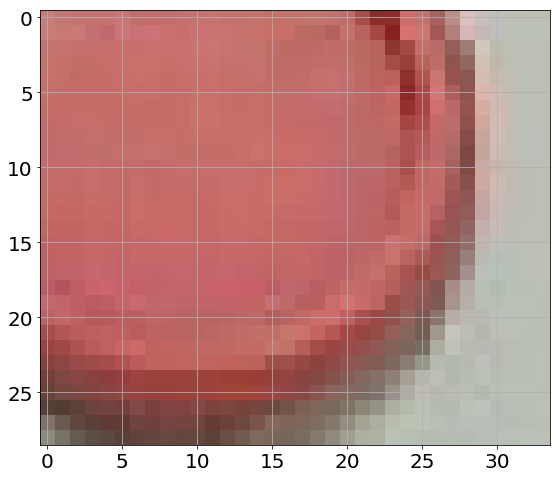

In [24]:
image.vector_to_image(data_train.vectors[50,:],data_train.shape)

In [34]:
C=NaiveBayes()

In [35]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.009268999099731445 seconds ')


In [36]:
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Test Set:', 100.0)


In [28]:
C=kNearestNeighbor()

In [29]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.004808902740478516 seconds ')


In [30]:
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Test Set:', 100.0)


In [31]:
C=CSC()

In [32]:
timeit(reset=True)
C.fit(data_train.vectors,data_train.targets)
print(("Training time: ",timeit()))

Time Reset
('Training time: ', '0.23209595680236816 seconds ')


In [33]:
print(("On Test Set:",C.percent_correct(data_test.vectors,data_test.targets)))

('On Test Set:', 100.0)


## Now load a board image and classify each square

In [37]:
def array_to_image_struct(arr):
    if isinstance(arr,list):
        N=len(arr)
        data=Struct()
        data.DESCR="Images"
        data.files=[None]*N
        data.data=arr
        data.targets=[0]*N
        data.target_names=['None']*N
        
        
    else:
        data=Struct()
        data.DESCR="Images"
        data.files=[None]
        data.data=[arr]
        data.targets=[0]
        data.target_names=['None']

    return data



In [38]:
data_train.target_names,data_test.target_names

(['white', 'red', 'black'], ['white', 'red', 'black'])

In [39]:
arr=read_image('robot images/test3.jpg')

Min and Max 1 233
Min and Max 1 233
Scaling it down....
Min and Max 0.00392156862745098 0.9137254901960784


1 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'None'
Mean:  [0.7254902  0.74117647 0.68627451 ... 0.7372549  0.75294118 0.69411765]
Median:  [0.7254902  0.74117647 0.68627451 ... 0.7372549  0.75294118 0.69411765]
Stddev:  [0. 0. 0. ... 0. 0. 0.]


array([0], dtype=int32)

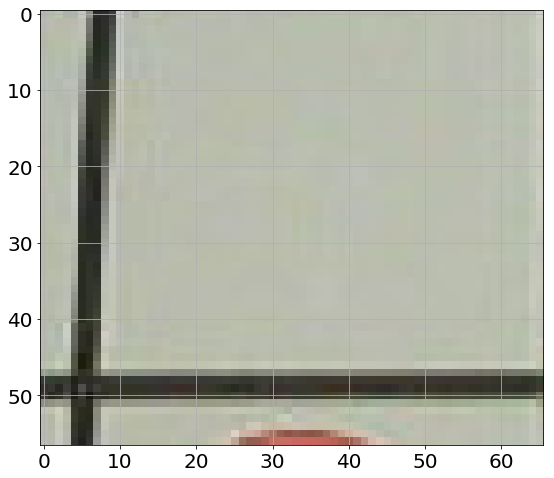

In [40]:
r,c=1,1

square=get_square(arr,board_size[0],board_size[1],r,c)
imshow(square)        
small_square=get_square(arr,board_size[0],board_size[1],r,c,50)
square_image=array_to_image_struct(small_square)
square_data=image.images_to_vectors(square_image)

C.predict(square_data.vectors)

Min and Max 5 238
Min and Max 5 238
Scaling it down....
Min and Max 0.0196078431372549 0.9333333333333333
16 vectors of length 2958
Feature names: 'p0', 'p1', 'p2', 'p3', 'p4'  , ... ,  'p2953', 'p2954', 'p2955', 'p2956', 'p2957'  (2958 features)
Target values given.
Target names: 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None', 'None'
Mean:  [0.5497549  0.55318627 0.52647059 ... 0.67083333 0.6747549  0.64460784]
Median:  [0.70588235 0.70980392 0.67058824 ... 0.72745098 0.73529412 0.70588235]
Stddev:  [0.23492299 0.23279914 0.23163204 ... 0.15605471 0.16640966 0.17464676]


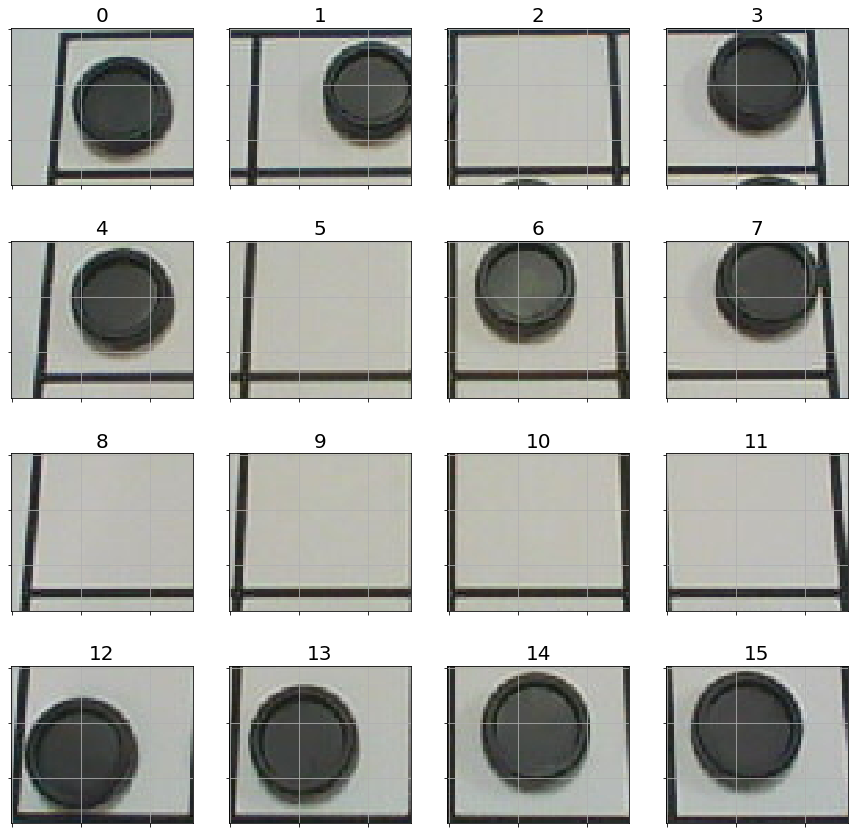

In [44]:
fname='robot images/test8.jpg'
count=1
arr=read_image(fname)
figure(figsize=(15,15))

squares=[]
for r in range(4):
    for c in range(4):
        subplot(4,4,count)
        square=get_square(arr,board_size[0],board_size[1],r,c)
        
        small_square=get_square(arr,board_size[0],board_size[1],r,c,50)
        
        squares.append(small_square)
        
        
        imshow(square)
        title(count-1)
            
        gca().set_xticklabels([])
        gca().set_yticklabels([])
        count+=1
        
square_images=array_to_image_struct(squares)
square_data=image.images_to_vectors(square_images)



In [45]:
data_train.target_names

['white', 'red', 'black']

In [46]:
from Game import *

state=Board(4,4)
state.board=C.predict(square_data.vectors)
print(state)

 2  2  0  2 
 2  0  2  2 
 0  0  0  0 
 2  2  2  2 

